In [1]:
import pandas 
import numpy as np
import sys
sys.path.append("..")
from Functions.UNSW_DF import *

In [27]:
# Loading the dataset
df = pd.read_csv("GLOBECOM (Performance Evaluation.csv")
col_names = ["train_acc", "test_acc", "F1", "PRC", "RCL"]
algorith_names = ["ANN", "DT", "SVM", "LR"]

# Multiplying the values in the columns for plotting purposes
for col in col_names:
    print(f"Multiplying {col}..")
    df[col] = 100 * df[col]
df

Multiplying train_acc..
Multiplying test_acc..
Multiplying F1..
Multiplying PRC..
Multiplying RCL..


,algorithm,train_acc,test_acc,F1,PRC,RCL
0,ANN,98.5,86.1,99.0,98.9,99.0
1,DT,96.0,86.7,89.0,81.8,97.6
2,SVM,95.1,84.0,86.9,79.0,96.6
3,LR,93.7,81.8,85.6,75.8,98.3


In [43]:
def barplot(data, to_range, x_label, y_label, title, x_size, y_size):
    """Plots barplot based on x and y labels
    Args:
        x_label (dataframe): input variables
        y_label (dataframe): output variables
        title (string): The title of the plot
        x_size (int): figure x size
        y_size (int): figure y size
    """
    from matplotlib.ticker import PercentFormatter
    from matplotlib.ticker import MultipleLocator
    from matplotlib.ticker import AutoMinorLocator
    # plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
    ax = data.plot(kind='bar', 
                rot=0, 
                xlabel = x_label, 
                ylabel = y_label, 
                title= title, 
                figsize=(x_size, y_size))

    # add some labels
    for c in ax.containers:
        # set the bar label
        ax.bar_label(c, 
                    fmt='%.2f%%', 
                    label_type='edge',
                    rotation=90, 
                    padding=7)

    # add a little space at the top of the plot for the annotation
    ax.margins(y=0.15)
    #ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocater(1))

    #yRange = np.linspace(0,1,11)
    #ax.set_yticks(yRange, minor=True)

    # Adding lines inbetween the bars
    minor_locator = AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minor_locator)
    plt.grid(which='minor')

    # Renaming the X ticks labels
    NewRange = range(0, 4)
    OldRange = range(0, 4)
    #ax.set_xticks(OldRange)
    #ax.set_xticklabels(NewRange)
    
    # Set number of ticks for x-axis
    ax.set_xticks(OldRange)
    # Set ticks labels for x-axis
    ax.set_xticklabels(algorith_names, rotation='horizontal', fontsize=12)
    

    # move the legend out of the plot
    ax.legend(title='Metrics', bbox_to_anchor=(1, 1.02), loc='upper left')

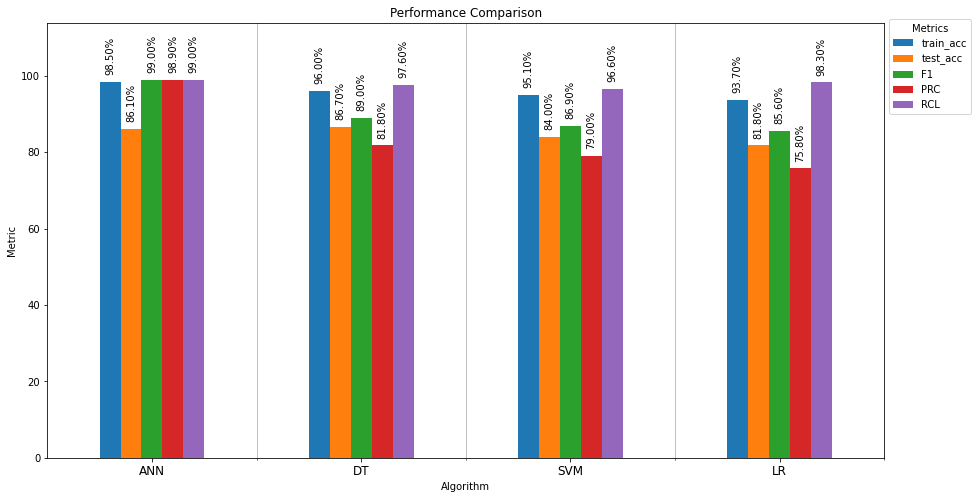

In [45]:
barplot(data=df, to_range=4, x_label="Algorithm", y_label="Metric", title="Performance Comparison", x_size=15, y_size=8)